In [33]:
library("dplyr")
library("ggplot2")
library("rio")

In [34]:
df = import("NHLTop100.xlsx")

## Initial Fit

R2 is 0.1082 and p is 0.0008317

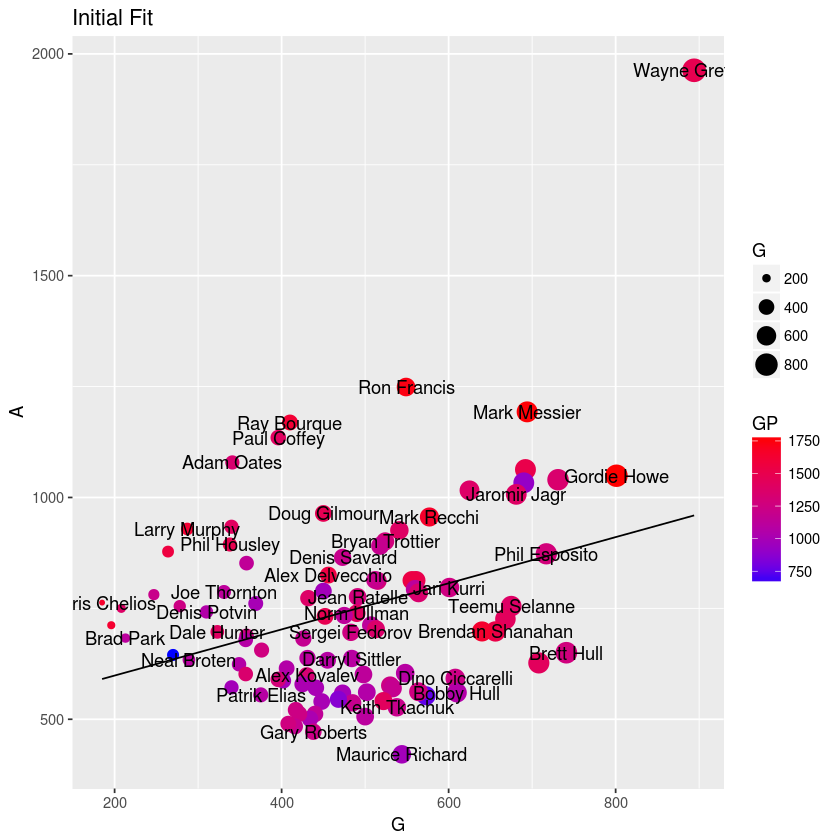

In [35]:
a1 <- df
a1$pred <- predict(lm(A ~ G, data = a1))
p1 <- ggplot(a1, aes(x = G, y = A, label=Player))
p1 + geom_point(aes(color = GP,size = G)) + geom_text(check_overlap = T) + geom_line(aes(y = pred)) + ggtitle("Initial Fit") + scale_colour_gradient(low = "Blue",high = "Red")  

In [36]:
a2 <- lm(A~G,data = a1)
summary(a2)


Call:
lm(formula = A ~ G, data = a1)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


### Wayne Gretzky Forced Fit

R2 is 0.1082 and p is 0.0008317

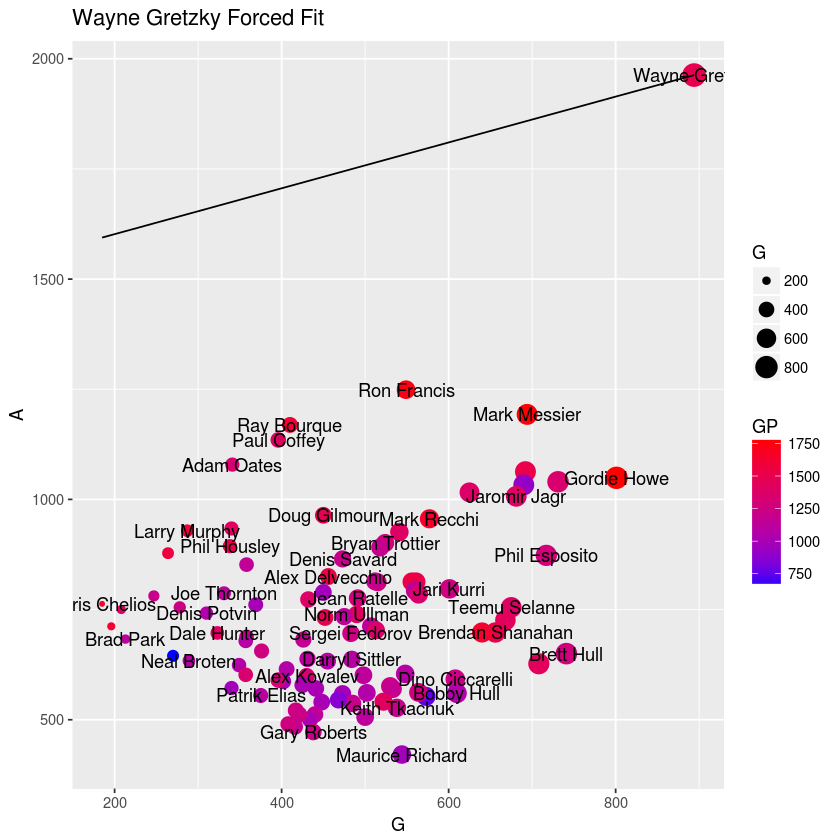

In [37]:
c1 <- df
c2 <- coef(lm(I(A-1963)~I(G-894),data = c1))
c1$pred <- predict(lm(I(A - c2[1]) ~ I(G), data = c1))
p3 <- ggplot(c1, aes(x = G, y = A, label = Player))
p3 + geom_point(aes(color = GP,size = G)) + geom_text(check_overlap = T) + geom_line(aes(y = pred)) + ggtitle("Wayne Gretzky Forced Fit") + scale_colour_gradient(low = "Blue",high = "Red") 

In [38]:
c3 <- lm(I(A)~I(G), data = c1)
summary(c3)


Call:
lm(formula = I(A) ~ I(G), data = c1)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
I(G)          0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


### Patrick Kane Forced Fit

R2 is 0.116 and p is 0.0004909

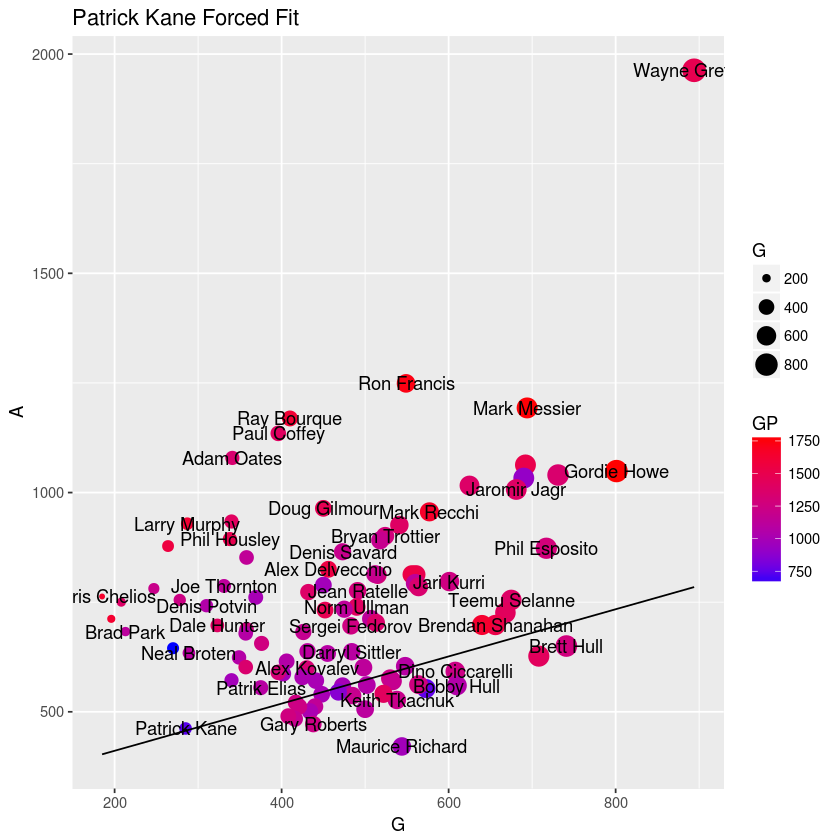

In [39]:
d1 <- df
d1 <- rbind(d1,list("101","Patrick Kane","CHI","R","2007-2008","2016-2017",735,285,462,747,81,284,250,0,1,49,3,2290))
d2 <- coef(lm(I(A-462)~I(G-285),data = c1))
d1$pred <- predict(lm(I(A-d2[1])~ I(G), data = d1))
p3 <- ggplot(d1, aes(x = G, y = A,, label=Player))
p3 + geom_point(aes(color = GP,size = G)) + geom_text(check_overlap = T) +geom_line(aes(y = pred)) + ggtitle("Patrick Kane Forced Fit") + scale_colour_gradient(low = "Blue",high = "Red")  

In [40]:
d3 <- lm(I(A-d2[1])~ I(G), data = d1)
summary(d3)


Call:
lm(formula = I(A - d2[1]) ~ I(G), data = d1)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 303.5455    73.5982   4.124 7.75e-05 ***
I(G)          0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


### Initial Fit through Origin

R2 is 0.8982 and p is < 2.2e-16

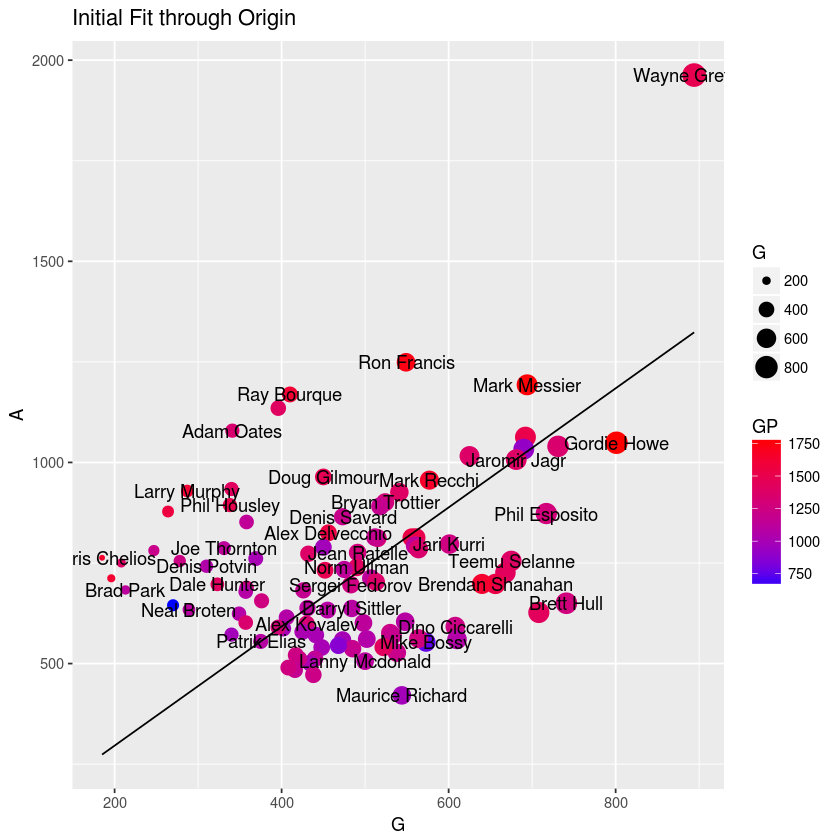

In [41]:
b1 <- df
b1$pred <- predict(lm(A ~ G+0, data = b1))
p2 <- ggplot(b1, aes(x = G, y = A, label = Player))
p2 + geom_point(aes(color = GP,size = G)) +  geom_text(check_overlap = T) + geom_line(aes(y = pred)) + ggtitle("Initial Fit through Origin") + scale_colour_gradient(low = "Blue",high = "Red")  

In [42]:
b2 <- lm(A~G+0,data = b1)
summary(b2)


Call:
lm(formula = A ~ G + 0, data = b1)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


### Wayne Gretzky Fit through Origin

R2 is 0.9091 and p is 2.2e-16

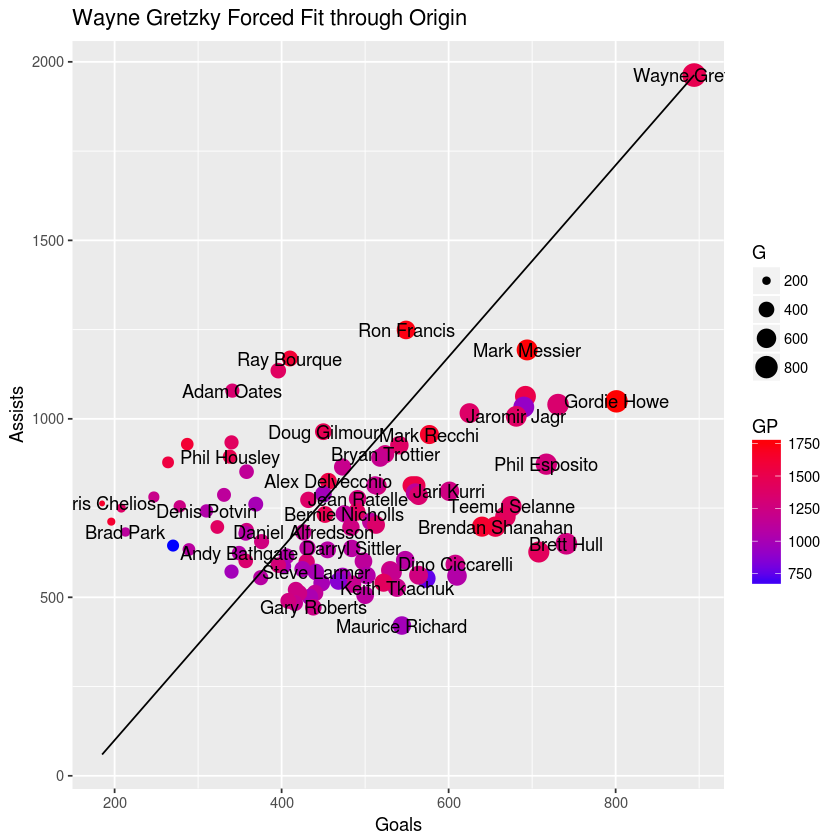

In [43]:
e1 <- df
e1$pred <- predict(lm(I(A-1963)~ I(G-894)+0, data = e1))
e1$pred <- e1$pred + 1963
p2 <- ggplot(e1, aes(x = G, y = A, label = Player))
p2 + geom_point(aes(color = GP,size = G)) + geom_text(check_overlap = T) + geom_line(aes(y = pred)) + ggtitle("Wayne Gretzky Forced Fit through Origin") +labs(x="Goals",y="Assists") + scale_colour_gradient(low = "Blue",high = "Red") 

In [44]:
e2 <- lm(I(A-1963)~I(G-894)+0,data = e1)
summary(e2)


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = e1)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


### Patrick Kane Forced Fit through Origin

R2 is 0.5759 and p is 2.2e-16

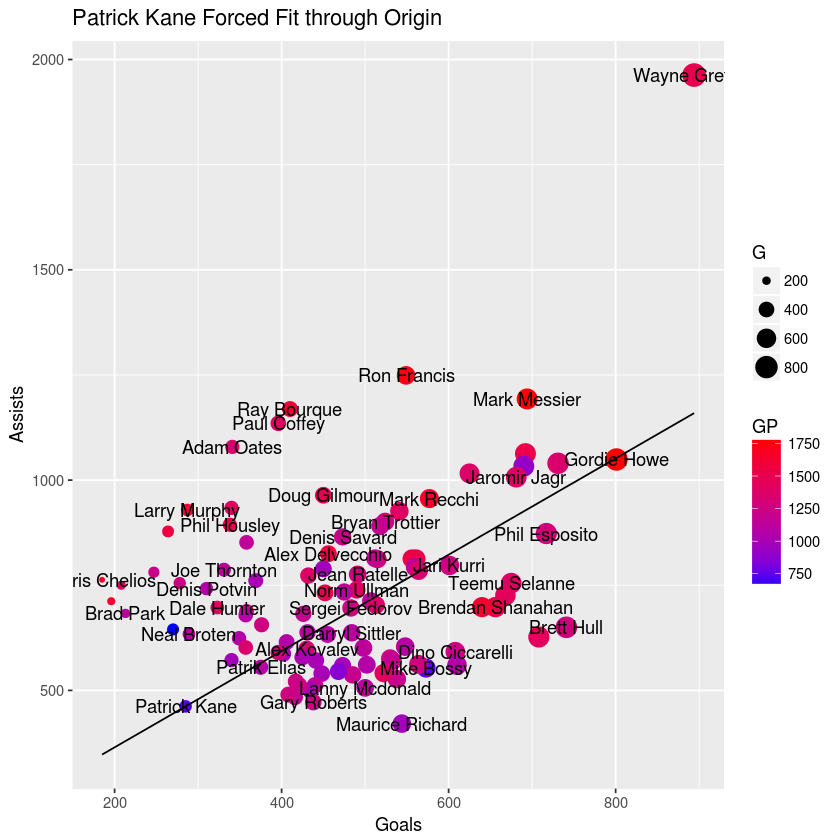

In [45]:
f1 <- d1
f1$pred <- predict(lm(I(A-462)~ I(G-285)+0, data = f1))
f1$pred <- f1$pred + 462
p3 <- ggplot(f1, aes(x = G, y = A,label = Player))
p3 + geom_point(aes(color = GP,size = G)) + geom_text(check_overlap = T) + geom_line(aes(y = pred)) + ggtitle("Patrick Kane Forced Fit through Origin") +labs(x="Goals",y="Assists") + scale_colour_gradient(low = "Blue",high = "Red") 

In [46]:
f2 <- lm(I(A-462)~I(G-285) + 0,data = f1)
summary(f2)


Call:
lm(formula = I(A - 462) ~ I(G - 285) + 0, data = f1)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -112.83   40.72  167.42  803.74 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)  1.14493    0.09825   11.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.6 on 100 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5717 
F-statistic: 135.8 on 1 and 100 DF,  p-value: < 2.2e-16


## R2 and p values

### R2
R2 value gives goodness of fit.
R2 value ranges from 0 to 1. The closer the R2 value is to 1, the better the fit.

### p
p value gives quality of data.
If p < 0.5, the model has higher significance of prediction.

### Inference
All p values are below 0.5 and Rsquare value is lowest for Wayne Gretzky Forced Fit through Origin which has 0.9091. Therefore this model has best fit and has good quality of data

In [47]:
Name = c("Initial Fit","Wayne Gretzky Forced Fit","Patrick Kane Forced Fit","Initial Fit through Origin","Wayne Gretzky Forced Fit through Origin","Patrick Kane Forced Fit through Origin")
Rsquare = c("0.1082","0.1082","0.116","0.8982","0.9091","0.5759")
p = c("0.0008317","0.0008317","0.0004909","< 2.2e-16","< 2.2e-16","< 2.2e-16")
mtable = data.frame(Name,Rsquare,p)
mtable

Name,Rsquare,p
Initial Fit,0.1082,0.0008317
Wayne Gretzky Forced Fit,0.1082,0.0008317
Patrick Kane Forced Fit,0.116,0.0004909
Initial Fit through Origin,0.8982,< 2.2e-16
Wayne Gretzky Forced Fit through Origin,0.9091,< 2.2e-16
Patrick Kane Forced Fit through Origin,0.5759,< 2.2e-16
